In [41]:
# The results of dynamical feature counting analysis

import os, sys, pickle, glob, json, warnings, copy
import numpy as np
from os.path import exists
from scipy import interpolate
from scipy.stats import ranksums, wilcoxon, ks_2samp

import matplotlib.pyplot as plt


from dynamics.analysis.KEmin import getnpts
%load_ext autoreload
%autoreload 2

warnings.filterwarnings("ignore", message="Trying to unpickle estimator PCA*")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
def getdirname(ttype,epoch, num=None, reg_idx = 0):
    """
    gets filenames of every type
    """

    if ttype == 'full_cl_20231003':
        dirname = '/scratch/dh148/dynamics/results/rnn/ac/20231003/full_cl/dynamics/KEmin_constrained/' 
        if epoch == 'wait':
            txt = 'kemin_rnn_curric_*block_10reg_'+str(reg_idx)+'_mixed_wait.dat'
        elif epoch == 'iti':
            txt = 'kemin_rnn_curric_*block_10reg_'+str(reg_idx)+'_mixed_iti.dat'
        elif epoch == 'start':
            txt = 'kemin_rnn_curric_*block_10reg_'+str(reg_idx)+'_mixed_start.dat'
        dirnames = glob.glob(dirname+txt)
        tphase = 5*np.ones((len(dirnames)))
    elif ttype == 'nok_cl':
        dirname = '/scratch/dh148/dynamics/results/rnn/ac/20231003/nok_cl/dynamics/KEmin_constrained/' 
        if epoch == 'wait':
            txt = 'kemin_rnn_curric_*block_60reg_'+str(reg_idx)+'_mixed_wait.dat'
        elif epoch == 'iti':
            txt = 'kemin_rnn_curric_*block_60reg_'+str(reg_idx)+'_mixed_iti.dat'
        elif epoch == 'start':
            txt = 'kemin_rnn_curric_*block_60reg_'+str(reg_idx)+'_mixed_start.dat'
        dirnames = glob.glob(dirname+txt)
        tphase = 5*np.ones((len(dirnames)))

    
    #if doing time dependence, do this in order
    if ttype == 'full_cl_time':
    
        dirname = '/scratch/dh148/dynamics/results/rnn/ac/20231003/full_cl/dynamics/KEmin_constrained/'     
        dirnames = []
        tphase = []
     
        txt = 'kemin_rnn_kindergarten_'+str(num)+'_simplereg_'+str(reg_idx)+'_kind_'+epoch+'.dat'
        dirnames.append(dirname+txt)
        tphase.append(0)  
        
        for k in range(1,11):
            txt = 'kemin_rnn_kindergarten_'+str(num)+'_int_0_'+str(k)+'reg_'+str(reg_idx)+'_kind_'+epoch+'.dat'
            dirnames.append(dirname+txt)
        tphase.extend(1*np.ones((10,)))
        for k in range(1,101,1):
            txt = 'kemin_rnn_pred_'+str(num)+'_'+str(k)+'reg_'+str(reg_idx)+'_kind_'+epoch+'.dat'
            dirnames.append(dirname+txt)
        tphase.extend(2*np.ones((100,)))
        
        for k in range(1,11):
            txt = 'kemin_rnn_curric_'+str(num)+'_nocatch_'+str(k)+'reg_'+str(reg_idx)+'_mixed_'+epoch+'.dat'
            dirnames.append(dirname+txt)
        tphase.extend(3*np.ones((10,)))
        for k in range(1,11):
            txt = 'kemin_rnn_curric_'+str(num)+'_catch_'+str(k)+'reg_'+str(reg_idx)+'_mixed_'+epoch+'.dat'
            dirnames.append(dirname+txt)
        tphase.extend(4*np.ones((10,)))
        for k in range(1,11):
            txt = 'kemin_rnn_curric_'+str(num)+'_block_'+str(k)+'reg_'+str(reg_idx)+'_mixed_'+epoch+'.dat'
            dirnames.append(dirname+txt)
        tphase.extend(5*np.ones((10,)))

    
    
    return dirnames, tphase



In [10]:
#Fig. E data the end-of-training cumulative plot. WILL NOT RUN in container. here for transparency pusposes
'''
st = 'all'
vers = 'full_cl_20231003' #the new cl results

for reg_idx in [0,1]:


    savedir = None
    eps = 0.01  # ratio of PC1 range
    doadaptive = True  # adaptive epsilon choice, based on PC range
    restrictrange = False

    dirnames, tphase = getdirname(vers,'wait', reg_idx=reg_idx)
    npts_kind_wait = getnpts(dirnames,tphase,st, eps=eps, doadaptive=doadaptive,savedir=savedir, restrictrange=restrictrange)

    dirnames, tphase = getdirname(vers,'iti', reg_idx=reg_idx)
    npts_kind_iti = getnpts(dirnames,tphase,st, eps=eps, doadaptive=doadaptive,savedir=savedir,restrictrange=restrictrange)

    dirnames, tphase = getdirname(vers,'start', reg_idx=reg_idx)
    npts_kind_start = getnpts(dirnames,tphase,st, eps=eps, doadaptive=doadaptive,savedir=savedir,restrictrange=restrictrange)

    dirnames, tphase = getdirname('nok_cl','wait', reg_idx=reg_idx)
    npts_classic_wait = getnpts(dirnames,tphase,st, eps=eps, doadaptive=doadaptive,savedir=savedir,restrictrange=restrictrange)

    dirnames, tphase = getdirname('nok_cl','iti', reg_idx=reg_idx)
    npts_classic_iti = getnpts(dirnames,tphase,st, eps=eps, doadaptive=doadaptive,savedir=savedir,restrictrange=restrictrange)

    dirnames, tphase = getdirname('nok_cl','start', reg_idx=reg_idx)
    npts_classic_start = getnpts(dirnames,tphase,st, eps=eps, doadaptive=doadaptive,savedir=savedir,restrictrange=restrictrange)


    savedir = '/scratch/dh148/dynamics/results/rnn/ac/20231003/figs/'
    if reg_idx == 0:
        savename = savedir + 'ke_results_ofc_wait.dat'
    elif reg_idx == 1:
        savename = savedir + 'ke_results_str_wait.dat'
    d = {'kindnpts_kind_wait_wait':npts_kind_wait, 'npts_kind_iti':npts_kind_iti, 'npts_kind_start':npts_kind_start,
         'npts_classic_wait':npts_classic_wait, 'npts_classic_iti':npts_classic_iti, 'npts_classic_start':npts_classic_start}


    with open(savename,'wb') as f:
        pickle.dump(d,f)
'''

In [31]:
# load data from above.

reg_idx = 1

savedir = '/Users/dhocker/projects/dynamics/results/20231003/'
if reg_idx == 0:
    savename = savedir + 'ke_results_ofc_wait.dat'
elif reg_idx == 1:
    savename = savedir + 'ke_results_str_wait.dat'
    
with open(savename,'rb') as f:
    d = pickle.load(f)
    
npts_kind_wait = d['npts_kind_wait']
npts_classic_wait = d['npts_classic_wait']


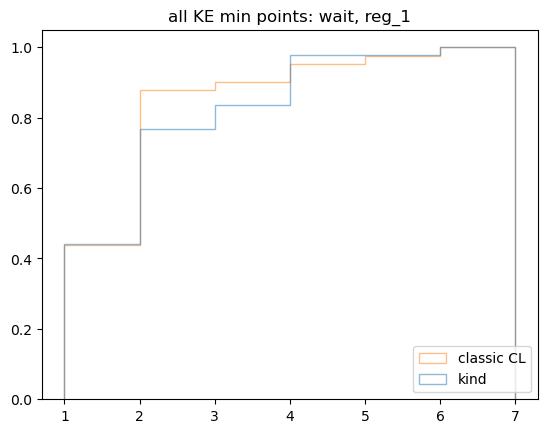

KstestResult(statistic=0.10532150776053215, pvalue=0.9435307913071052, statistic_location=2, statistic_sign=-1)


In [32]:
# 4 f
plt.hist([npts_kind_wait[2],npts_classic_wait[2]],bins = [1,2,3,4,5,6,7],
         cumulative=True,histtype="step", alpha = 0.5,density=True, label=['kind','classic CL'])
plt.legend(loc='lower right')

#plt.hist([npts_kind_wait[2],npts_classic_wait[2]],bins = [1,2,3,4,5,6,7],
#         cumulative=False,histtype="bar",stacked=True, alpha = 0.5,density=True, label=['kind','classic CL'])
#plt.legend(loc='upper right')

plt.title('all KE min points: wait, reg_'+str(reg_idx) )
plt.show()

ksres = ks_2samp(npts_kind_wait[2], npts_classic_wait[2])
print(ksres)

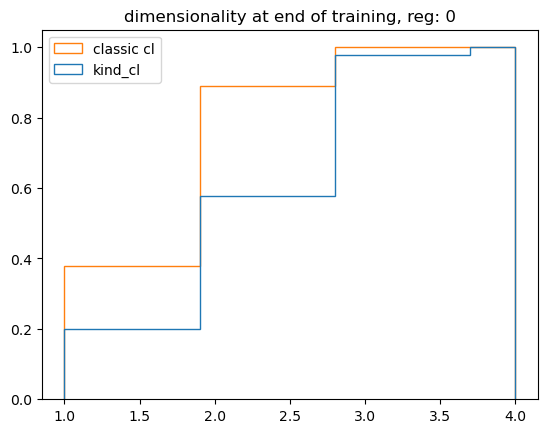

KstestResult(statistic=0.3111111111111111, pvalue=0.025096204154622846, statistic_location=2, statistic_sign=-1)


In [29]:
#supp. dimensionality 

plt.hist([npts_kind_wait[-2],npts_classic_wait[-2]],label=['kind_cl','classic cl'],
         cumulative=True,histtype='step', density=True)

plt.legend()
plt.title('dimensionality at end of training, reg: '+str(reg_idx))
plt.show()

ksres = ks_2samp(npts_kind_wait[-2], npts_classic_wait[-2])
print(ksres)


In [33]:
# calculate population average number of features over training. WILL NOT RUN in container. here for transparency
'''
npts_all = []
npts_all_str = []

userange = range(1,51)
eps = 0.01
doadaptive = True

for j in userange:
    print(j)
    st = 'all'
    ttype = 'full_cl_time'
    epoch = 'wait'
    num = j
    reg_idx = 0
    dirnames, tphase = getdirname(ttype,epoch,num,reg_idx)
    npts_kind_wait = getnpts(dirnames,tphase,st, eps=eps, doadaptive=doadaptive)
    npts_j = np.array(npts_kind_wait[0])+np.array(npts_kind_wait[1])
    npts_all.append(npts_j)
    
for j in userange:
    print(j)
    st = 'all'
    ttype = 'full_cl_time'
    epoch = 'wait'
    num = j
    reg_idx = 1
    dirnames, tphase_str = getdirname(ttype,epoch,num,reg_idx)
    npts_kind_wait = getnpts(dirnames,tphase,st, eps=eps, doadaptive=doadaptive)
    npts_j = np.array(npts_kind_wait[0])+np.array(npts_kind_wait[1])
    npts_all_str.append(npts_j)
    
    
savedir = '/scratch/dh148/dynamics/results/rnn/ac/20231003/figs/'
savename = savedir + 'ke_results_overtraining.dat'
d = {'dirnames':dirnames, 'tphase':tphase, 'tphase_str':tphase_str, 'npts_all':npts_all,
     'npts_all_str':npts_all_str}


with open(savename,'wb') as f:
    pickle.dump(d,f)
    
    
'''


"\nnpts_all = []\nnpts_all_str = []\n\nuserange = range(1,51)\neps = 0.01\ndoadaptive = True\n\nfor j in userange:\n    print(j)\n    st = 'all'\n    ttype = 'full_cl_time'\n    epoch = 'wait'\n    num = j\n    reg_idx = 0\n    dirnames, tphase = getdirname(ttype,epoch,num,reg_idx)\n    npts_kind_wait = getnpts(dirnames,tphase,st, eps=eps, doadaptive=doadaptive)\n    npts_j = np.array(npts_kind_wait[0])+np.array(npts_kind_wait[1])\n    npts_all.append(npts_j)\n    \nfor j in userange:\n    print(j)\n    st = 'all'\n    ttype = 'full_cl_time'\n    epoch = 'wait'\n    num = j\n    reg_idx = 1\n    dirnames, tphase_str = getdirname(ttype,epoch,num,reg_idx)\n    npts_kind_wait = getnpts(dirnames,tphase,st, eps=eps, doadaptive=doadaptive)\n    npts_j = np.array(npts_kind_wait[0])+np.array(npts_kind_wait[1])\n    npts_all_str.append(npts_j)\n    \n    \nsavedir = '/scratch/dh148/dynamics/results/rnn/ac/20231003/figs/'\nsavename = savedir + 'ke_results_overtraining.dat'\nd = {'dirnames':dirna

In [39]:
# load data from above

savedir = '/Users/dhocker/projects/dynamics/results/20231003/'
savename = savedir + 'ke_results_overtraining.dat'
with open(savename, 'rb') as f:
    d = pickle.load(f)
    
dirname = d['dirnames']
tphase = d['tphase']
tphase_str = d['tphase_str']
npts_all = d['npts_all']
npts_all_str = d['npts_all_str']



In [42]:
# omit nans from tphase and npts
tphase_list = []
X_nonan = []
for j in npts_all:
    tphase_cpy = copy.deepcopy(tphase)
    test = np.argwhere(~np.isnan(j))[:,0]
    
    x_j = list(np.array(j)[test])
    
    tphase_list.append(list(np.array(tphase_cpy)[test]))
    X_nonan.append(x_j)
    
    
tphase_list_str = []
X_nonan_str = []
for j in npts_all_str:
    tphase_cpy = copy.deepcopy(tphase_str)
    test = np.argwhere(~np.isnan(j))[:,0]
    
    x_j = list(np.array(j)[test])
    
    tphase_list_str.append(list(np.array(tphase_cpy)[test]))
    X_nonan_str.append(x_j)
    
    
#RNN number 44 didn't finish saving in striatum for some reason. pop it
_ = tphase_list_str.pop(44)
_ = X_nonan_str.pop(44)


In [43]:
#find the events on a network-by-network basis
events_idx = [list(np.argwhere(np.diff(k)>0)[:,0]) for k in tphase_list]
#add final event
_ = [events_idx[k].append(len(tphase_list[k])-1) for k in range(len(tphase_list))]

events_idx_str = [list(np.argwhere(np.diff(k)>0)[:,0]) for k in tphase_list_str]
#add final event
_ = [events_idx_str[k].append(len(tphase_list_str[k])-1) for k in range(len(tphase_list_str))]


In [46]:
def warp_new(X,ev_idx, medians = None):
    """ will warp to median timing of each event. events_idx must be matrix. X is variable length list"""
    
    Xcpy = copy.deepcopy(X)
    nevents = len(ev_idx[0])-1
    if medians is None:
        medians = []  
        for j in range(nevents+1):
            ev_j = [k[j] for k in ev_idx]
            medians.append(int(np.median(ev_j)))

            
    ntrials = len(ev_idx)
    ntwarped = medians[-1]
    tlen = list(np.diff(medians))
    medians = np.array(medians)


    Tratio = medians/ntwarped # proportion of warped trial that epoch should occupy
    twarp = [np.linspace(Tratio[k], Tratio[k+1], tlen[k]) for k in range(0, nevents)] 

    ind = 0
    Xwarped = []

    print('numbver of rnns')
    print(len(ev_idx))

    for k in range(ntrials):
        Xwarp_k = []
        for m in range(nevents):
            idx1 = ev_idx[k][m]
            idx2 = ev_idx[k][m + 1]

            d1 = Xcpy[k][idx1:idx2 + 1]

            if len(d1) > 1:
                tvec = np.linspace(Tratio[m], Tratio[m + 1], len(d1))
                f = interpolate.interp1d(tvec, d1, axis=0)
                d1_warped = f(twarp[m])
            else: #coincident events
                d1_warped = Xcpy[k,idx1]*np.ones(len(twarp[m]))            

            Xwarp_k.extend(d1_warped)

        Xwarped.append(Xwarp_k)


    return Xwarped,medians,twarp
    

In [47]:
npts_all_warped,Tmedians, twarp = warp_new(X_nonan, events_idx)
npts_all_warped_str,Tmedians_str, twarp_str = warp_new(X_nonan_str, events_idx_str, medians = Tmedians)

numbver of rnns
50
numbver of rnns
49


[ 0  9 31 41 51 60]


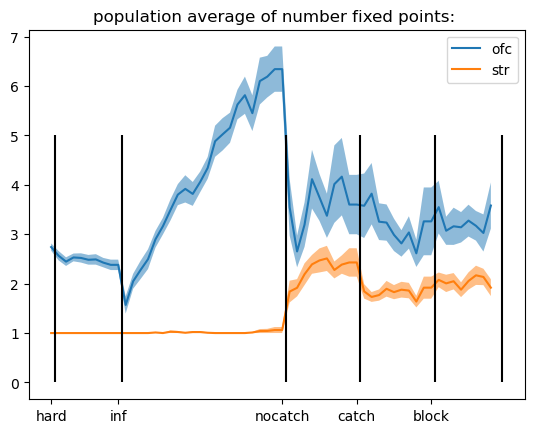

In [48]:
#fig D

nuse_ofc = npts_all_warped  
nuse_str = npts_all_warped_str
ev_use = Tmedians
ev_use_str = Tmedians_str

#ofc
npts_filt = np.nanmean(np.array(nuse_ofc),0)
numrnns = np.sum(~np.isnan(nuse_ofc),axis=0)
npts_std = np.nanstd(np.array(nuse_ofc),0)/np.sqrt(numrnns)

#str
npts_filt_str = np.nanmean(np.array(nuse_str),0)
numrnns_str = np.sum(~np.isnan(nuse_str),axis=0)
npts_std_str = np.nanstd(np.array(nuse_str),0)/np.sqrt(numrnns_str)

plt.plot(npts_filt,label='ofc')
plt.fill_between(range(len(npts_filt)),npts_filt-npts_std, npts_filt+npts_std,alpha=0.5 )

plt.plot(npts_filt_str,label='str')
plt.fill_between(range(len(npts_filt_str)),npts_filt_str-npts_std_str, npts_filt_str+npts_std_str,alpha=0.5 )

plt.title('population average of number fixed points: ')
plt.legend()


change_idx = ev_use
print(change_idx)
for k in change_idx:
    plt.vlines(k+0.5,0,5,color='k')

xdict = {0:'simple', 1:'hard', 2:'inf.', 3:'nocatch', 4:'catch', 5:'block'}
labels = ['hard','inf','nocatch','catch','block']
plt.xticks(change_idx[:-1], labels=labels)


plt.show()